# Task 1

In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [333]:
pip install fitter

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
                                              0.0/298.0 kB ? eta -:--:--
     ----------------------------           225.3/298.0 kB 4.6 MB/s eta 0:00:01
     -------------------------------------- 298.0/298.0 kB 3.7 MB/s eta 0:00:00
                                              0.0/42.5 MB ? eta -:--:--
                                              0.5/42.5 MB 16.2 MB/s eta 0:00:03
     -                                        1.1/42.5 MB 13.7 MB/s eta 0:00:04
     -                                        1.6/42.5 MB 12.5 MB/s eta 0:00:04
     -                                        1.9/42.5 MB 11.3 MB/s eta 0:00:04
     --                                      

In [340]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import collections
from scipy import stats
# from fitter import Fitter

#### Useful functions

Return string with the number of vertices and edges

In [270]:
def numb_vert_ed(G):
    return f" has {nx.number_of_nodes(G)} nodes and {nx.number_of_edges(G)} edges"

Calculate the average degree:

$\langle k\rangle = \frac{1}{N}\sum_{i=1}^N k_i =\frac{2L}{N}$

In [272]:
def av_degree(G):
    return 2 * nx.number_of_edges(G) / nx.number_of_nodes(G)

Calculate the average degree using degree distribution:

$\langle k \rangle = \sum_{k=0}^\infty kp_k$, where

$p_k = \frac{N_k}{N}$ -- probability that a randomly selected node in the network with $N$ nodes has degree $k$, and

$N_k = p_k N$ -- the number of nodes with degree $k$

In [293]:
def av_degree_dist(G):
    N = nx.number_of_nodes(G)
    
    degrees = sorted([d for n, d in G.degree()])
    degreeCount = collections.Counter(degrees)
    deg, cnt = zip(*degreeCount.items())
    
    N_k = np.array(cnt)
    p_k = N_k / N
    
    return sum(deg * p_k)

 Calculate the variance of the degree distribution

$Var = \sum_{k=0}^\infty k^2 p_k - (\sum_{k=0}^\infty k p_k)^2 = \sum_{k=0}^\infty k^2 p_k - \langle k \rangle^2$

In [300]:
def var(G):
    N = nx.number_of_nodes(G)
    
    degrees = sorted([d for n, d in G.degree()])
    degreeCount = collections.Counter(degrees)
    deg, cnt = zip(*degreeCount.items())
    
    N_k = np.array(cnt)
    p_k = N_k / N
    
    return sum(np.power(deg, 2) * p_k) - av_degree_dist(G)**2

Draw the plot of the degree distribution (the frequency plot for the degrees)

In [330]:
def draw_hist(G):
    degrees = sorted([d for n, d in G.degree()])
    plt.figure(figsize = (4, 3))
    plt.hist(degrees)
    plt.show()

In [ ]:
def fitter(G, fit):
    f = Fitter(height,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
    f.fit()
    f.summary()

In [ ]:
f = Fitter(data)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

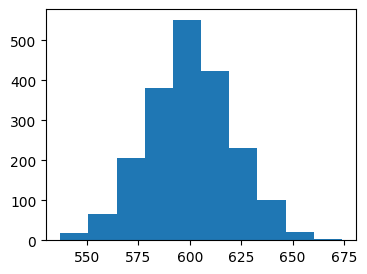

In [336]:
draw_hist(random_1)

In [341]:
data = [d for n, d in random_1.degree()]
data

[605,
 646,
 576,
 625,
 613,
 607,
 642,
 589,
 612,
 612,
 595,
 628,
 594,
 590,
 618,
 585,
 581,
 654,
 588,
 581,
 612,
 622,
 597,
 622,
 585,
 624,
 551,
 598,
 599,
 618,
 581,
 581,
 578,
 628,
 585,
 602,
 605,
 587,
 576,
 574,
 570,
 614,
 622,
 569,
 602,
 593,
 600,
 590,
 627,
 608,
 619,
 574,
 596,
 589,
 619,
 585,
 594,
 589,
 576,
 604,
 652,
 618,
 632,
 616,
 593,
 590,
 620,
 674,
 594,
 597,
 625,
 566,
 576,
 596,
 598,
 588,
 610,
 625,
 599,
 617,
 581,
 616,
 581,
 588,
 644,
 572,
 602,
 603,
 641,
 622,
 573,
 584,
 584,
 611,
 576,
 592,
 623,
 609,
 605,
 580,
 608,
 622,
 597,
 578,
 605,
 588,
 601,
 606,
 596,
 607,
 573,
 598,
 591,
 612,
 608,
 623,
 622,
 587,
 598,
 626,
 613,
 600,
 574,
 577,
 626,
 613,
 588,
 594,
 568,
 607,
 589,
 598,
 595,
 602,
 575,
 619,
 589,
 604,
 602,
 609,
 593,
 585,
 593,
 612,
 586,
 566,
 608,
 605,
 605,
 583,
 617,
 646,
 626,
 585,
 596,
 589,
 593,
 612,
 583,
 612,
 603,
 588,
 617,
 609,
 588,
 656,
 606

In [346]:
x = np.linspace(min(data), max(data), 100)
mean, var = norm.fit(var_3)
mean, var
norm_fitted = norm.pdf(ix, mean, var)
norm_fitted
plt.hist(var_3, density = True, bins = 8)
plt.plot(ix, norm_fitted, 'r')
plt.show()

In [347]:
par = stats.nbinom.fit(data)
par

AttributeError: 'nbinom_gen' object has no attribute 'fit'

In [349]:
par = stats.fit(stats.nbinom, data,[(0, 30), (0, 1)])


  params: FitParams(n=30.0, p=0.04767110094257582, loc=0.0)
 success: True
 message: 'Optimization terminated successfully.'

In [351]:
par.params

FitParams(n=30.0, p=0.04767110094257582, loc=0.0)

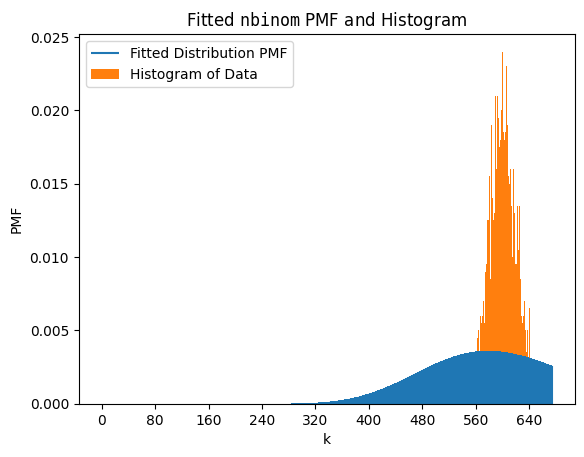

In [352]:
par.plot()
plt.show()

Fitting 110 distributions:  82%|████████████████████████████████████████████▏         | 90/110 [00:51<00:43,  2.17s/it]C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED nct distribution (taking more than 30 seconds)
Fitting 110 distributions:  85%|█████████████████████████████████████████████▋        | 93/110 [01:02<00:47,  2.81s/it]C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packag

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gennorm,0.001466,1163.846671,-28229.300587,inf,0.021209,0.324787
fatiguelife,0.001466,1164.521422,-28229.166776,inf,0.020146,0.386294
betaprime,0.001467,1166.006786,-28221.068631,inf,0.020362,0.373247
f,0.001467,1162.409651,-28221.051788,inf,0.020355,0.373676
gengamma,0.001467,1165.469627,-28220.279748,inf,0.021833,0.291947


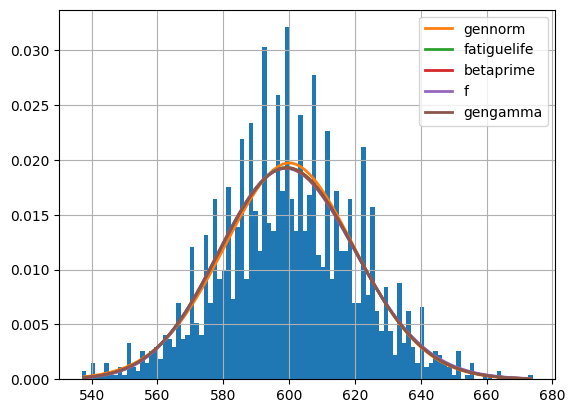

In [339]:
f = Fitter([d for n, d in random_1.degree()])
f.fit()
f.summary()

In [ ]:
POISSON

## Random graph

In [263]:
def random_graph(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    for i in range(N):
        for j in range(i+1, N):
            q = random.uniform(0, 1)
            if q < p:
                G.add_edge(i, j)
    return G

In [370]:
N = 15
p_1 = 0.3
p_2 = 0.5
p_3 = 0.8
graph_1 = random_graph(N, p_1)
graph_2 = random_graph(N, p_2)
graph_3 = random_graph(N, p_3)

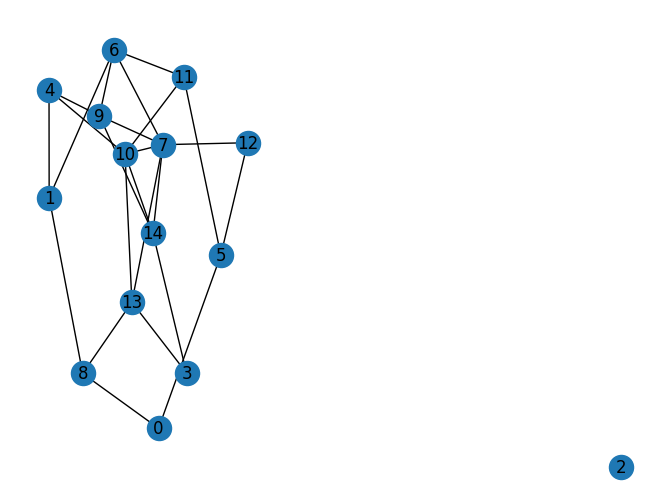

In [371]:
nx.draw(graph_1, with_labels = True)

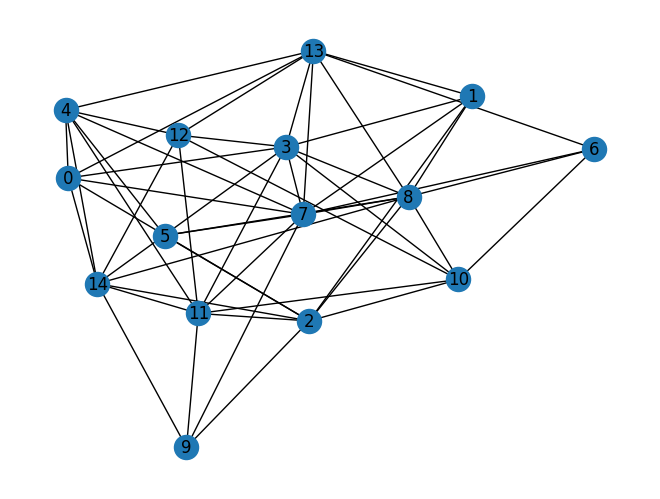

In [355]:
nx.draw(graph_2, with_labels = True)

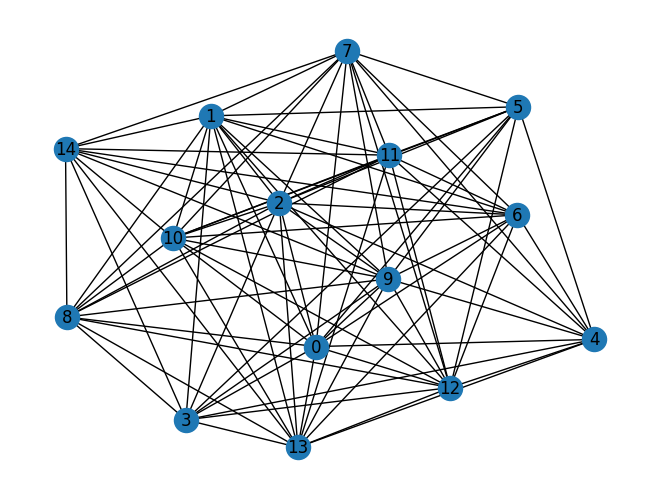

In [356]:
nx.draw(graph_3, with_labels = True)

In [514]:
N = 2000
p_1 = 0.3
p_2 = 0.5
p_3 = 0.8
graph_1 = random_graph(N, p_1)
graph_2 = random_graph(N, p_2)
graph_3 = random_graph(N, p_3)

In [360]:
print(f"Random graph with p = {p_1}" + numb_vert_ed(graph_1))
print(f"Random graph with p = {p_2}" + numb_vert_ed(graph_2))
print(f"Random graph with p = {p_3}" + numb_vert_ed(graph_3))

Random graph with p = 0.3 has 2000 nodes and 600587 edges
Random graph with p = 0.5 has 2000 nodes and 1000066 edges
Random graph with p = 0.8 has 2000 nodes and 1599956 edges


In [362]:
k_av_1 = av_degree(graph_1)
k_av_dist_1 = av_degree_dist(graph_1)

k_av_2 = av_degree(graph_2)
k_av_dist_2 = av_degree_dist(graph_2)

k_av_3 = av_degree(graph_3)
k_av_dist_3 = av_degree_dist(graph_3)

print(f"Random graph with p = {p_1} has average degree: {k_av_1} and average degree is calculated using degree distribution: {k_av_dist_1}")
print(f"Random graph with p = {p_2} has average degree: {k_av_2} and average degree is calculated using degree distribution: {k_av_dist_2}")
print(f"Random graph with p = {p_3} has average degree: {k_av_3} and average degree is calculated using degree distribution: {k_av_dist_3}")

In [365]:
var_1 = var(graph_1)
var_2 = var(graph_2)
var_3 = var(graph_3)

print(f"Random graph with p = {p_1} has variance of the degree distribution: {var_1}")
print(f"Random graph with p = {p_2} has variance of the degree distribution: {var_2}")
print(f"Random graph with p = {p_3} has variance of the degree distribution: {var_3}")

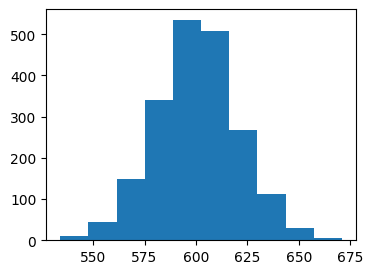

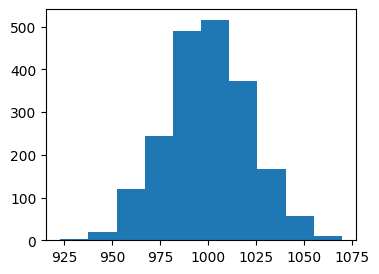

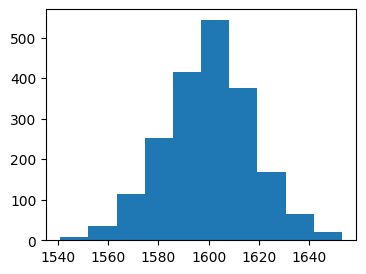

In [368]:
draw_hist(graph_1)
draw_hist(graph_2)
draw_hist(graph_3)

Fit a model distribution to the obtained data

In [ ]:
def fitter(G, fit):
    f = Fitter(height,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
    f.fit()
    f.summary()

In [ ]:
f = Fitter(data)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [ ]:
f = Fitter(data)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

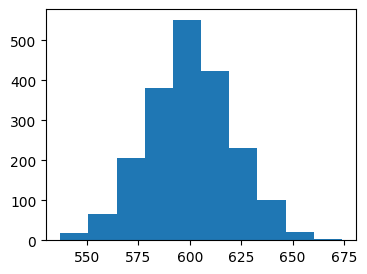

In [336]:
draw_hist(random_1)

In [341]:
data = [d for n, d in random_1.degree()]
data

[605,
 646,
 576,
 625,
 613,
 607,
 642,
 589,
 612,
 612,
 595,
 628,
 594,
 590,
 618,
 585,
 581,
 654,
 588,
 581,
 612,
 622,
 597,
 622,
 585,
 624,
 551,
 598,
 599,
 618,
 581,
 581,
 578,
 628,
 585,
 602,
 605,
 587,
 576,
 574,
 570,
 614,
 622,
 569,
 602,
 593,
 600,
 590,
 627,
 608,
 619,
 574,
 596,
 589,
 619,
 585,
 594,
 589,
 576,
 604,
 652,
 618,
 632,
 616,
 593,
 590,
 620,
 674,
 594,
 597,
 625,
 566,
 576,
 596,
 598,
 588,
 610,
 625,
 599,
 617,
 581,
 616,
 581,
 588,
 644,
 572,
 602,
 603,
 641,
 622,
 573,
 584,
 584,
 611,
 576,
 592,
 623,
 609,
 605,
 580,
 608,
 622,
 597,
 578,
 605,
 588,
 601,
 606,
 596,
 607,
 573,
 598,
 591,
 612,
 608,
 623,
 622,
 587,
 598,
 626,
 613,
 600,
 574,
 577,
 626,
 613,
 588,
 594,
 568,
 607,
 589,
 598,
 595,
 602,
 575,
 619,
 589,
 604,
 602,
 609,
 593,
 585,
 593,
 612,
 586,
 566,
 608,
 605,
 605,
 583,
 617,
 646,
 626,
 585,
 596,
 589,
 593,
 612,
 583,
 612,
 603,
 588,
 617,
 609,
 588,
 656,
 606

In [346]:
x = np.linspace(min(data), max(data), 100)
mean, var = norm.fit(var_3)
mean, var
norm_fitted = norm.pdf(ix, mean, var)
norm_fitted
plt.hist(var_3, density = True, bins = 8)
plt.plot(ix, norm_fitted, 'r')
plt.show()

In [347]:
par = stats.nbinom.fit(data)
par

AttributeError: 'nbinom_gen' object has no attribute 'fit'

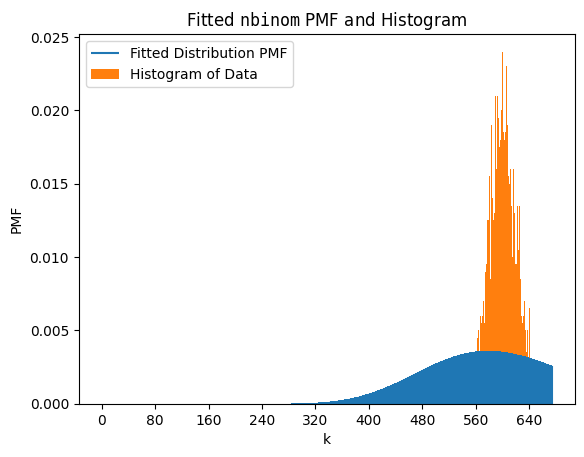

In [352]:
par.plot()
plt.show()

Fitting 110 distributions:  82%|████████████████████████████████████████████▏         | 90/110 [00:51<00:43,  2.17s/it]C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED nct distribution (taking more than 30 seconds)
Fitting 110 distributions:  85%|█████████████████████████████████████████████▋        | 93/110 [01:02<00:47,  2.81s/it]C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packag

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gennorm,0.001466,1163.846671,-28229.300587,inf,0.021209,0.324787
fatiguelife,0.001466,1164.521422,-28229.166776,inf,0.020146,0.386294
betaprime,0.001467,1166.006786,-28221.068631,inf,0.020362,0.373247
f,0.001467,1162.409651,-28221.051788,inf,0.020355,0.373676
gengamma,0.001467,1165.469627,-28220.279748,inf,0.021833,0.291947


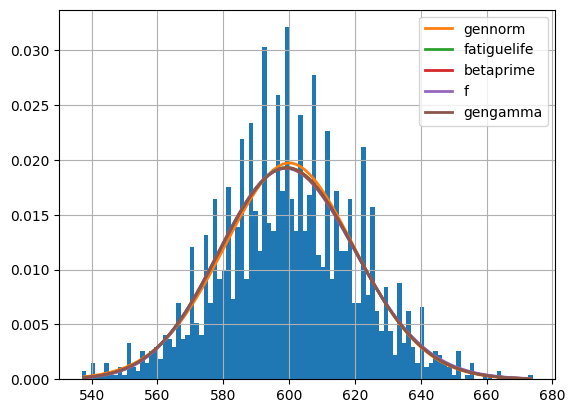

In [339]:
f = Fitter([d for n, d in random_1.degree()])
f.fit()
f.summary()

In [515]:
g = graph_1

In [516]:
data = [d for n, d in g.degree()]
data

[614,
 618,
 591,
 580,
 600,
 605,
 592,
 625,
 591,
 593,
 607,
 590,
 606,
 608,
 603,
 590,
 610,
 631,
 589,
 567,
 584,
 599,
 576,
 578,
 536,
 620,
 615,
 547,
 598,
 568,
 550,
 587,
 631,
 625,
 632,
 597,
 589,
 574,
 611,
 580,
 618,
 592,
 586,
 611,
 608,
 587,
 622,
 587,
 586,
 578,
 599,
 613,
 648,
 602,
 599,
 543,
 579,
 583,
 585,
 578,
 638,
 558,
 640,
 591,
 561,
 603,
 601,
 608,
 609,
 584,
 579,
 624,
 611,
 617,
 616,
 573,
 559,
 591,
 591,
 616,
 577,
 601,
 582,
 614,
 643,
 551,
 638,
 593,
 605,
 584,
 611,
 591,
 590,
 650,
 595,
 605,
 569,
 524,
 607,
 593,
 608,
 567,
 614,
 595,
 579,
 599,
 593,
 613,
 626,
 579,
 574,
 623,
 605,
 627,
 610,
 602,
 627,
 606,
 602,
 600,
 594,
 592,
 600,
 582,
 595,
 591,
 559,
 603,
 589,
 607,
 646,
 590,
 612,
 602,
 593,
 620,
 570,
 597,
 615,
 615,
 614,
 601,
 592,
 616,
 585,
 620,
 613,
 584,
 575,
 575,
 596,
 620,
 617,
 578,
 616,
 614,
 611,
 582,
 616,
 570,
 617,
 589,
 586,
 575,
 603,
 611,
 582

Fitting 110 distributions:  82%|████████████████████████████████████████████▏         | 90/110 [00:51<00:43,  2.17s/it]C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED nct distribution (taking more than 30 seconds)
Fitting 110 distributions:  85%|█████████████████████████████████████████████▋        | 93/110 [01:02<00:47,  2.81s/it]C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packag

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gennorm,0.001466,1163.846671,-28229.300587,inf,0.021209,0.324787
fatiguelife,0.001466,1164.521422,-28229.166776,inf,0.020146,0.386294
betaprime,0.001467,1166.006786,-28221.068631,inf,0.020362,0.373247
f,0.001467,1162.409651,-28221.051788,inf,0.020355,0.373676
gengamma,0.001467,1165.469627,-28220.279748,inf,0.021833,0.291947


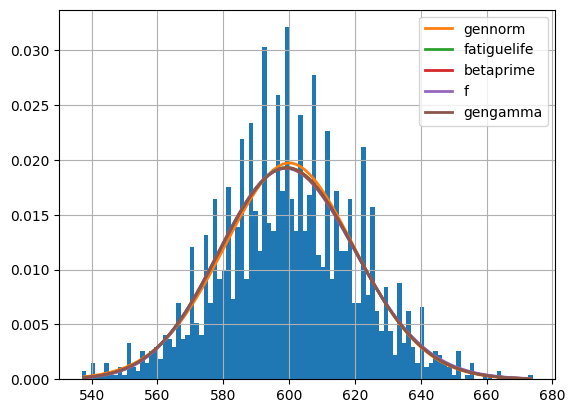

In [339]:
f = Fitter([d for n, d in random_1.degree()])
f.fit()
f.summary()

In [ ]:
x = np.linspace(min(data), max(data), 100)
mean, var = norm.fit(var_3)
mean, var
norm_fitted = norm.pdf(ix, mean, var)
norm_fitted
plt.hist(var_3, density = True, bins = 8)
plt.plot(ix, norm_fitted, 'r')
plt.show()

## Watts-Strogatz model

In [372]:
def watts_strogatz_graph(N, K, p):
    if K >= N:
        print("K must be smaller than N")
        return None
    
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    k = K // 2
    
    for i in range(N):
        for j in range(1, k+1):
            G.add_edge(i, (i+j) % N)
            
    for e in G.edges:
        q = random.uniform(0, 1)
        if q < p:
            v = random.randint(0, N-1)
            while v == e[0] or [e[0], v] in G.edges:
                v = random.randint(0, N-1)
            G.add_edge(e[0], v)
            G.remove_edge(e[0], e[1])
    return G

In [373]:
N = 15
K = 4
p_1 = 0
p_2 = 0.5
p_3 = 1
graph_1 = watts_strogatz_graph(N, K, p_1)
graph_2 = watts_strogatz_graph(N, K, p_2)
graph_3 = watts_strogatz_graph(N, K, p_3)

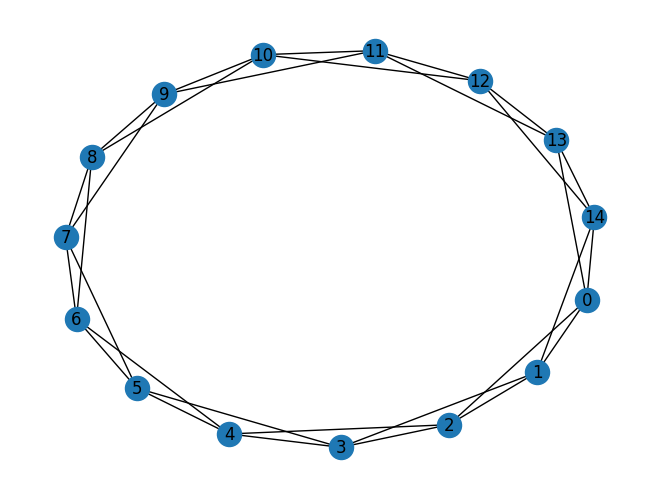

In [374]:
nx.draw(graph_1, with_labels = True)

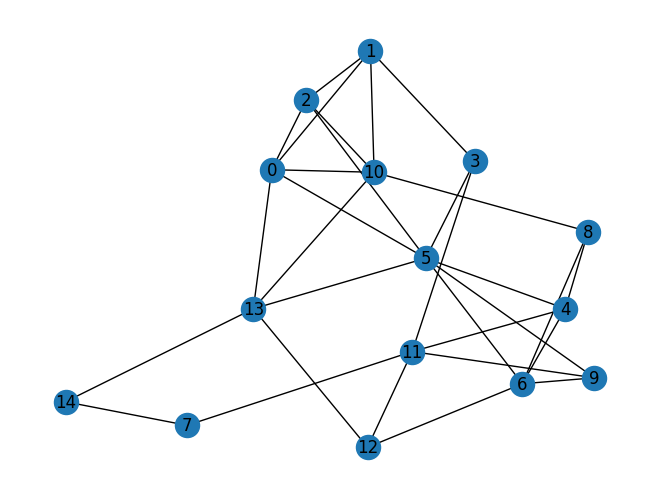

In [375]:
nx.draw(graph_2, with_labels = True)

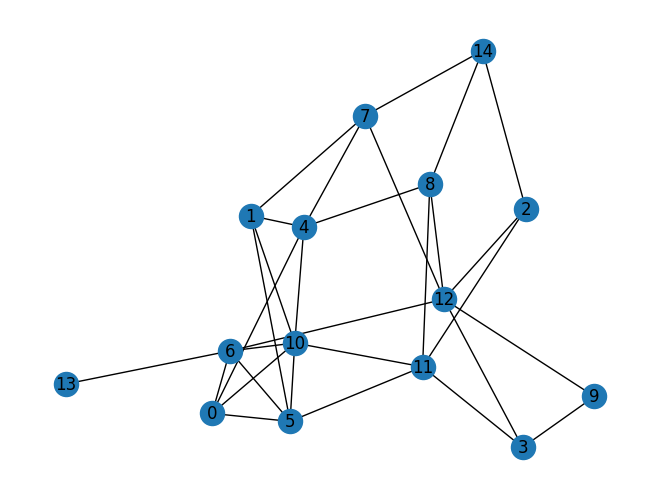

In [376]:
nx.draw(graph_3, with_labels = True)

In [377]:
N = 2000
K = 4
p_1 = 0.3
p_2 = 0.5
p_3 = 0.8
graph_1 = watts_strogatz_graph(N, K, p_1)
graph_2 = watts_strogatz_graph(N, K, p_2)
graph_3 = watts_strogatz_graph(N, K, p_3)

In [378]:
print(f"Watts-Strogatz graph with K = {K}, p = {p_1}" + numb_vert_ed(graph_1))
print(f"Watts-Strogatz graph with K = {K}, p = {p_2}" + numb_vert_ed(graph_2))
print(f"Watts-Strogatz graph with K = {K}, p = {p_3}" + numb_vert_ed(graph_3))

Watts-Strogatz graph with K = 4, p = 0.3 has 2000 nodes and 4000 edges
Watts-Strogatz graph with K = 4, p = 0.5 has 2000 nodes and 4000 edges
Watts-Strogatz graph with K = 4, p = 0.8 has 2000 nodes and 4000 edges


In [379]:
k_av_1 = av_degree(graph_1)
k_av_dist_1 = av_degree_dist(graph_1)

k_av_2 = av_degree(graph_2)
k_av_dist_2 = av_degree_dist(graph_2)

k_av_3 = av_degree(graph_3)
k_av_dist_3 = av_degree_dist(graph_3)

print(f"Watts-Strogatz graph with K = {K}, p = {p_1} has average degree: {k_av_1} and average degree is calculated using degree distribution: {k_av_dist_1}")
print(f"Watts-Strogatz graph with K = {K}, p = {p_2} has average degree: {k_av_2} and average degree is calculated using degree distribution: {k_av_dist_2}")
print(f"Watts-Strogatz graph with K = {K}, p = {p_3} has average degree: {k_av_3} and average degree is calculated using degree distribution: {k_av_dist_3}")

Watts-Strogatz graph with K = 4, p = 0.3 has average degree: 4.0 and average degree is calculated using degree distribution: 4.0
Watts-Strogatz graph with K = 4, p = 0.5 has average degree: 4.0 and average degree is calculated using degree distribution: 4.000000000000001
Watts-Strogatz graph with K = 4, p = 0.8 has average degree: 4.0 and average degree is calculated using degree distribution: 4.0


In [381]:
var_1 = var(graph_1)
var_2 = var(graph_2)
var_3 = var(graph_3)

print(f"Watts-Strogatz graph with K = {K}, p = {p_1} has variance of the degree distribution: {var_1}")
print(f"Watts-Strogatz graph with K = {K}, p = {p_2} has variance of the degree distribution: {var_2}")
print(f"Watts-Strogatz graph with K = {K}, p = {p_3} has variance of the degree distribution: {var_3}")

Watts-Strogatz graph with K = 4, p = 0.3 has variance of the degree distribution: 1.036999999999999
Watts-Strogatz graph with K = 4, p = 0.5 has variance of the degree distribution: 1.4819999999999958
Watts-Strogatz graph with K = 4, p = 0.8 has variance of the degree distribution: 1.9709999999999965


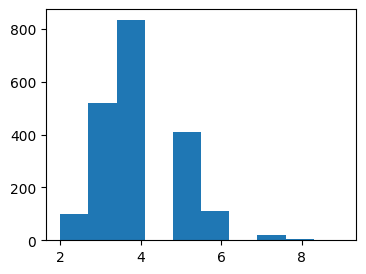

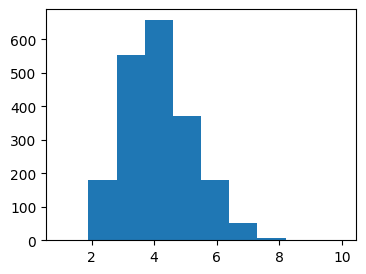

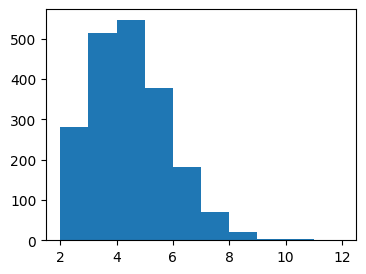

In [382]:
draw_hist(graph_1)
draw_hist(graph_2)
draw_hist(graph_3)

Fit a model distribution to the obtained data

## Barabasi-Albert model

In [503]:
def barabasi_albert_graph(N, m0, m):
    if m0 >= N:
        print("m0 must be smaller than N")
        return None
    
    if m >= N:
        print("m must be smaller than N")
        return None
    
    if m > m0:
        print("m must be smaller or equal than m0")
        return None
    
    G = nx.Graph()
    G.add_nodes_from(range(m0))
    
    for i in range(m0 + 1):
        G.add_edge(i % m0, (i+1) % m0)
            
    for i in range(m0, N):
        ver = np.array(range(i))
        k_i = np.array([d for n, d in G.degree()])
        pi_i = k_i / sum(k_i)
        
        for j in range(m):
            v = random.choices(ver, weights = pi_i)[0]
            G.add_edge(i, v)
            ind = np.where(ver == v)
            ver = np.delete(ver, ind)
            pi_i = np.delete(pi_i, ind)
    return G

In [504]:
N = 15
m0 = 4
m_1 = 2
m_2 = 3
m_3 = 4
graph_1 = barabasi_albert_graph(N, m0, m_1)
graph_2 = barabasi_albert_graph(N, m0, m_2)
graph_3 = barabasi_albert_graph(N, m0, m_3)

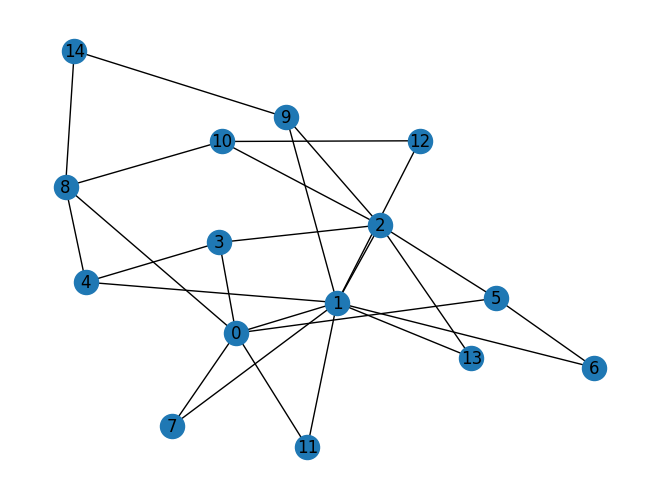

In [505]:
nx.draw(graph_1, with_labels = True)

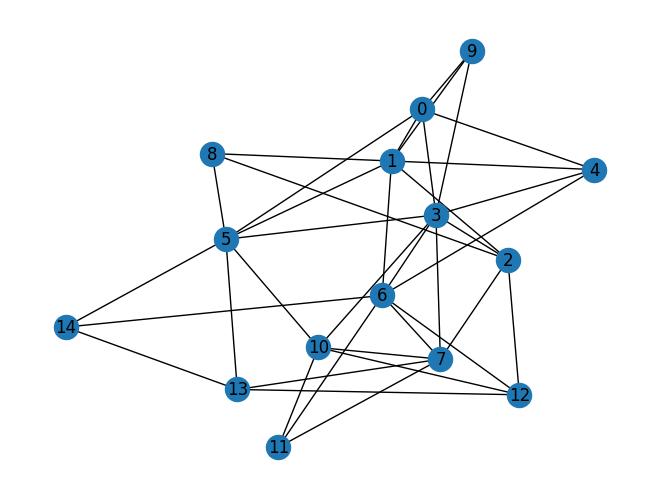

In [506]:
nx.draw(graph_2, with_labels = True)

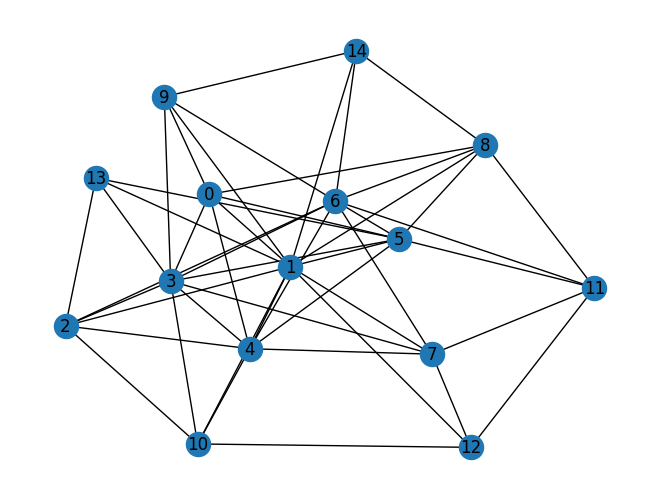

In [507]:
nx.draw(graph_3, with_labels = True)

In [508]:
N = 2000
m0 = 4
m_1 = 2
m_2 = 3
m_3 = 4
graph_1 = barabasi_albert_graph(N, m0, m_1)
graph_2 = barabasi_albert_graph(N, m0, m_2)
graph_3 = barabasi_albert_graph(N, m0, m_3)

In [509]:
print(f"Barabasi-Albert graph with m0 = {m0}, m = {m_1}" + numb_vert_ed(graph_1))
print(f"Barabasi-Albert graph with m0 = {m0}, m = {m_2}" + numb_vert_ed(graph_2))
print(f"Barabasi-Albert graph with m0 = {m0}, m = {m_3}" + numb_vert_ed(graph_3))

Barabasi-Albert graph with m0 = 4, m = 2 has 2000 nodes and 3996 edges
Barabasi-Albert graph with m0 = 4, m = 3 has 2000 nodes and 5992 edges
Barabasi-Albert graph with m0 = 4, m = 4 has 2000 nodes and 7988 edges


In [510]:
print(m0 + N - m0, m0 + m_1 * (N - m0))
print(m0 + N - m0, m0 + m_2 * (N - m0))
print(m0 + N - m0, m0 + m_3 * (N - m0))

2000 3996
2000 5992
2000 7988


In [511]:
k_av_1 = av_degree(graph_1)
k_av_dist_1 = av_degree_dist(graph_1)

k_av_2 = av_degree(graph_2)
k_av_dist_2 = av_degree_dist(graph_2)

k_av_3 = av_degree(graph_3)
k_av_dist_3 = av_degree_dist(graph_3)

print(f"Barabasi-Albert graph with m0 = {m0}, m = {m_1} has average degree: {k_av_1} and average degree is calculated using degree distribution: {k_av_dist_1}")
print(f"Barabasi-Albert graph with m0 = {m0}, m = {m_2} has average degree: {k_av_2} and average degree is calculated using degree distribution: {k_av_dist_2}")
print(f"Barabasi-Albert graph with m0 = {m0}, m = {m_3} and average degree is calculated using degree distribution: {k_av_dist_3}")

Barabasi-Albert graph with m0 = 4, m = 2 has average degree: 3.996 and average degree is calculated using degree distribution: 3.996
Barabasi-Albert graph with m0 = 4, m = 3 has average degree: 5.992 and average degree is calculated using degree distribution: 5.992000000000002
Barabasi-Albert graph with m0 = 4, m = 4 and average degree is calculated using degree distribution: 7.988000000000003


In [512]:
var_1 = var(graph_1)
var_2 = var(graph_2)
var_3 = var(graph_3)

print(f"Watts-Strogatz graph with K = 4, p = {p_1} has variance of the degree distribution: {var_1}")
print(f"Watts-Strogatz graph with K = 4, p = {p_2} has variance of the degree distribution: {var_2}")
print(f"Watts-Strogatz graph with K = 4, p = {p_3} has variance of the degree distribution: {var_3}")

Watts-Strogatz graph with K = 4, p = 0 has variance of the degree distribution: 31.74798400000001
Watts-Strogatz graph with K = 4, p = 0.5 has variance of the degree distribution: 57.56593600000001
Watts-Strogatz graph with K = 4, p = 1 has variance of the degree distribution: 99.22985599999993


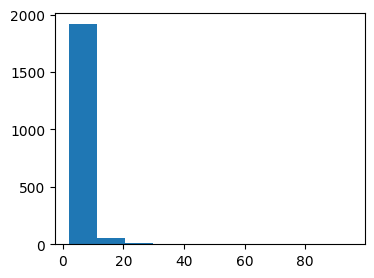

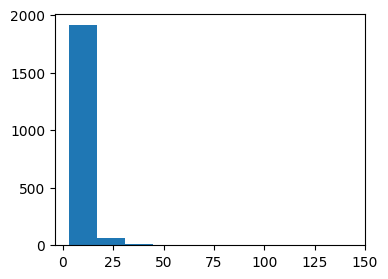

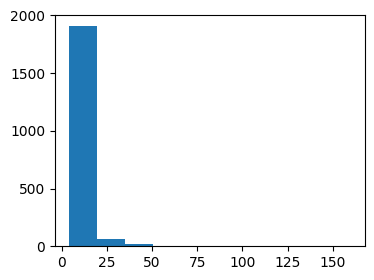

In [513]:
draw_hist(graph_1)
draw_hist(graph_2)
draw_hist(graph_3)

Fit a model distribution to the obtained data

# Task 2

## Web Scraping. Facebook

Sources:

Web Scraping Facebook Friends List Using Selenium in Python 
https://www.youtube.com/watch?v=KQiDLVa9sX4

How to Scrape Profile Links of Facebook Friends with Python
https://aniquekhan.com/how-to-scrape-profile-links-of-facebook-friends-with-python/

Read your network of friends in Facebook by scraping with Python
https://medium.com/analytics-vidhya/read-your-network-of-friends-in-facebook-by-scraping-with-python-a012adabb713

Organize your wedding with social network analysis in Python
https://rubchume.medium.com/organize-your-wedding-with-social-network-analysis-in-python-aeab9d8814b3

In [ ]:
pip install selenium

In [5]:
pip install webdriver_manager

                                              0.0/77.1 kB ? eta -:--:--
     ---------------------------------------- 77.1/77.1 kB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass
from webdriver_manager.chrome import ChromeDriverManager 
import requests
import json
import re
import urllib

Save my login and password

In [9]:
user_id = "masha.kogut2001@gmail.com"
my_password = getpass.getpass()

my_id = "profile.php?id=100005913558261"
my_name = "Mariia Kohut"
my_link = "https://www.facebook.com/profile.php?id=100005913558261"

········


Open browser. Open Facebook

In [4]:
driver = webdriver.Chrome(executable_path = ChromeDriverManager().install())
driver.get("https://www.facebook.com/")
driver.maximize_window()

C:\Users\Asus\AppData\Local\Temp\ipykernel_15616\2794323963.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = ChromeDriverManager().install())


Accept cookies

In [5]:
driver.find_element(By.XPATH, '//button[@class="_42ft _4jy0 _9xo6 _4jy3 _4jy1 selected _51sy"]').click()

Fill the email field

In [12]:
email_field = driver.find_element(By.ID, 'email')
email_field.clear()
email_field.send_keys(user_id)

Fill the password field

In [13]:
pass_field = driver.find_element(By.ID, 'pass')
pass_field.clear()
pass_field.send_keys(my_password)

Click button "Login"

In [14]:
driver.find_element(By.XPATH, '//button[@class="_42ft _4jy0 _6lth _4jy6 _4jy1 selected _51sy"]').click()

Go to the page with list of my friends

In [15]:
driver.get('https://www.facebook.com/me/friends')

Use of the GraphQL API to find my friends.

For the backend to provide you with the information you ask, it has to be sure you are who you say you are. And it does that in two ways. First, you should set the cookies for the session to be the same the Chrome instance is using. And second, you must send, in the http request data, a field called `fb_dtsg`.

Access cookie fields with the Selenium driver, and assign them to a requests session

In [16]:
session = requests.session()
session.cookies.update({
    cookie["name"]: cookie["value"]
    for cookie in driver.get_cookies()
})

The `fb_dtsg` token can be found by finding a pattern in the html source of the friend list page

In [17]:
pattern = r'\["DTSGInitData",\[\],{"token":"\S+","async_get_token":"\S+?"},\d+\]'
match = re.search(pattern, driver.page_source)
fb_dtsg_token = json.loads(match.group())[2]["token"]

It seems that when requesting your list of friends, each friend has an alphanumeric long code (a cursor) associated to it.

The field page_info is an object with two fields: has_next_page and end_cursor. has_next_page is a Boolean that tells if there are more friends to request or if it is the end of the list. In the case there are more, end_cursor is the cursor of that next friend.

Get an http response with our friends’ data.

Parse it to a Python dictionary.

Do that until no friends are left.

In [18]:
page_info = dict(has_next_page = True, end_cursor = None)

url = 'https://www.facebook.com/api/graphql/'

headers = {
    "accept": "*/*",
    "accept-language": "es-ES,es;q=0.9",
    "content-type": "application/x-www-form-urlencoded",
    "sec-ch-ua": "\" Not;A Brand\";v=\"99\", \"Google Chrome\";v=\"91\", \"Chromium\";v=\"91\"",
    "sec-ch-ua-mobile": "?0",
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-origin",
    "x-fb-friendly-name": "FriendingCometFriendsListPaginationQuery",
    "referrer": "https://www.facebook.com/friends/list",
    "referrerPolicy": "strict-origin-when-cross-origin",
}

friends = []

while page_info["has_next_page"]:
    response = session.post(
        url,
        headers = headers,
        data = urllib.parse.urlencode(
            {
                "fb_dtsg": fb_dtsg_token,
                "fb_api_req_friendly_name": "FriendingCometFriendsListPaginationQuery",
                "variables": json.dumps(
                    {
                        "count": 30,
                        "cursor": page_info["end_cursor"],
                        "scale": 1,
                    }
                ).replace(" ", ""),
                "doc_id": 4268740419836267,
            }
        )
    )
    
    response_dict = json.loads(response.content)
    friend_objects = response_dict["data"]["viewer"]["all_friends"]["edges"]

    friends += [
        dict(
            user_id = friend['node']['url'].partition(".com/")[2],
            name = friend['node']['name'],
            link = friend['node']['url']
        )
        for friend in friend_objects
        if friend["node"]["__typename"] == "User"
    ]
    
    page_info = response_dict["data"]["viewer"]["all_friends"]["page_info"]
    
print(f"Number of friends: {len(friends)}")

Number of friends: 61


In [19]:
friends

[{'user_id': 'profile.php?id=100007502475142',
  'name': 'Миша Тяпкин',
  'link': 'https://www.facebook.com/profile.php?id=100007502475142'},
 {'user_id': 'lisa.martynova.7',
  'name': 'Лиза Мартынова',
  'link': 'https://www.facebook.com/lisa.martynova.7'},
 {'user_id': 'cheret.katherine',
  'name': 'Kasia Oczeretian',
  'link': 'https://www.facebook.com/cheret.katherine'},
 {'user_id': 'profile.php?id=100008389686721',
  'name': 'Мария Микенина Микенина Мария',
  'link': 'https://www.facebook.com/profile.php?id=100008389686721'},
 {'user_id': 'profile.php?id=100006868091656',
  'name': 'Александр Когут',
  'link': 'https://www.facebook.com/profile.php?id=100006868091656'},
 {'user_id': 'liza.shulgina.1',
  'name': 'Shulhina Lisa',
  'link': 'https://www.facebook.com/liza.shulgina.1'},
 {'user_id': 'sasha.shestak.35',
  'name': 'Sasha Shestak',
  'link': 'https://www.facebook.com/sasha.shestak.35'},
 {'user_id': 'profile.php?id=100006500923354',
  'name': 'Женя Садовая',
  'link': 'ht

Now. Get friends of my friends.

Visit, one by one, each of my friends’ profiles, go to their friends’ section, scroll down until all of them have appeared, and finally read them and save them.

There are two types of URLs when it comes to user profiles. Depending on which of them we have, the friends page has a slightly different URL. In the first case, it is a query parameter. In the second case, it is part of the path.

In [20]:
def visit_friends_page(friend):
    profile_link = friend["link"]
    url_parsed = urllib.parse.urlparse(profile_link)

    if url_parsed.path == "/profile.php":
        friends_link =  f"{profile_link}&sk=friends"
    else:
        friends_link = f"{profile_link}/friends"

    driver.get(friends_link)
    sleep(0.5)

If I find that element, then I will scroll down. And if I find it again, I will scroll down again, until it has disappeared (until all friends have been loaded).

In [21]:
loading_friends_panel_class = "x6s0dn4 x1lq5wgf xgqcy7u x30kzoy x9jhf4c x1olyfxc x9f619 x78zum5 x1e56ztr x1gefphp xyamay9 x1pi30zi x1l90r2v x1swvt13"
loading_friends_panel_selector = f"div[class='{loading_friends_panel_class}'][data-visualcompletion='loading-state']"
   
def wait_for_every_friend_to_load():
    loading_element = driver.find_elements(By.CSS_SELECTOR, loading_friends_panel_selector)

    while len(loading_element) > 0:
        driver.find_element_by_xpath('//body').send_keys(Keys.END)
        sleep(0.5)
        loading_element = driver.find_elements(By.CSS_SELECTOR, loading_friends_panel_selector)


The remaining part is to just read all friends. 

First, find the panel with friends.

In [22]:
friends_panel_selector = "div[data-pagelet='ProfileAppSection_0']"

Each of the friends will appear in his own “card”, and his or her name is a `<a>` element.

In [23]:
friend_link_class = ("x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou "
                     "x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm "
                     "xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd "
                     "x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x1heor9g xt0b8zv")
friend_link_selector = f"a[class='{friend_link_class}']"

Each of the links for friend has two pieces of useful information. On the one hand there is the text, which is the name of the mutual friend. The other is the URL to which it redirects, which is his or her profile link.

Get list of all friends of my friends.

In [24]:
friends_all = {}
num_friends = len(friends)
for i, friend in enumerate(friends, start = 1):
    print(f"Reading friends with {friend['name']}. ({i} of {num_friends})")
    
    visit_friends_page(friend)

    wait_for_every_friend_to_load()
    
    friends_pannel = driver.find_element(By.CSS_SELECTOR, friends_panel_selector)
    
    friend_links = driver.find_elements(By.CSS_SELECTOR, friend_link_selector)
    
    friends_of_friend = []
    for link in friend_links:
        name = link.text
        link = link.get_attribute("href")
        
        friends_of_friend.append(
            dict(
                user_id = link.partition(".com/")[2],
                name = name,
                link = link,
            )
        )
    
    friends_all[friend["user_id"]] = friends_of_friend

Reading friends with Миша Тяпкин. (1 of 61)
Reading friends with Лиза Мартынова. (2 of 61)
Reading friends with Kasia Oczeretian. (3 of 61)
Reading friends with Мария Микенина Микенина Мария. (4 of 61)
Reading friends with Александр Когут. (5 of 61)
Reading friends with Shulhina Lisa. (6 of 61)
Reading friends with Sasha Shestak. (7 of 61)
Reading friends with Женя Садовая. (8 of 61)
Reading friends with Ольга Ханевич. (9 of 61)
Reading friends with Oleksii Demydenko. (10 of 61)
Reading friends with Karolina Haieva. (11 of 61)
Reading friends with Victoria Boichenko. (12 of 61)
Reading friends with Igors Poznakovs. (13 of 61)
Reading friends with Olha Yekhanurova. (14 of 61)
Reading friends with Катя Лотоцкая. (15 of 61)
Reading friends with Marichka Hladka. (16 of 61)
Reading friends with Александра Гержан. (17 of 61)
Reading friends with Генрих Груз. (18 of 61)
Reading friends with Богдан Мричко. (19 of 61)
Reading friends with Наталия Мизюк. (20 of 61)
Reading friends with Саша Мото

In [27]:
friends_all

{'profile.php?id=100007502475142': [{'user_id': 'chitalova.kz',
   'name': 'Елена Читалова',
   'link': 'https://www.facebook.com/chitalova.kz'},
  {'user_id': 'juliana.amirhan',
   'name': 'Юлия Орлова',
   'link': 'https://www.facebook.com/juliana.amirhan'},
  {'user_id': 'profile.php?id=100005913558261',
   'name': 'Mariia Kohut',
   'link': 'https://www.facebook.com/profile.php?id=100005913558261'},
  {'user_id': 'HayDayOfficial/',
   'name': 'Hay Day',
   'link': 'https://www.facebook.com/HayDayOfficial/'},
  {'user_id': 'HayDayOfficial/',
   'name': 'Hay Day',
   'link': 'https://www.facebook.com/HayDayOfficial/'}],
 'lisa.martynova.7': [{'user_id': 'profile.php?id=100009221965041',
   'name': 'Генрих Груз',
   'link': 'https://www.facebook.com/profile.php?id=100009221965041'},
  {'user_id': 'kateryna.bilorus',
   'name': 'Катерина Белорус',
   'link': 'https://www.facebook.com/kateryna.bilorus'},
  {'user_id': 'profile.php?id=100005733886175',
   'name': 'Марго Чемер',
   'link'

In [28]:
len(friends_all)

61

Add my profile.

In [29]:
my_friends = []
for f in friends:
    my_friends.append(dict(
            user_id = f['user_id'],
            name = f['name'],
            link = f['link'],
        ))

friends_all[my_id] = my_friends

In [30]:
friends_all

{'profile.php?id=100007502475142': [{'user_id': 'chitalova.kz',
   'name': 'Елена Читалова',
   'link': 'https://www.facebook.com/chitalova.kz'},
  {'user_id': 'juliana.amirhan',
   'name': 'Юлия Орлова',
   'link': 'https://www.facebook.com/juliana.amirhan'},
  {'user_id': 'profile.php?id=100005913558261',
   'name': 'Mariia Kohut',
   'link': 'https://www.facebook.com/profile.php?id=100005913558261'},
  {'user_id': 'HayDayOfficial/',
   'name': 'Hay Day',
   'link': 'https://www.facebook.com/HayDayOfficial/'},
  {'user_id': 'HayDayOfficial/',
   'name': 'Hay Day',
   'link': 'https://www.facebook.com/HayDayOfficial/'}],
 'lisa.martynova.7': [{'user_id': 'profile.php?id=100009221965041',
   'name': 'Генрих Груз',
   'link': 'https://www.facebook.com/profile.php?id=100009221965041'},
  {'user_id': 'kateryna.bilorus',
   'name': 'Катерина Белорус',
   'link': 'https://www.facebook.com/kateryna.bilorus'},
  {'user_id': 'profile.php?id=100005733886175',
   'name': 'Марго Чемер',
   'link'

Save friends to the file.

In [37]:
with open("my_friends_network", "w") as outfile:
    json.dump(friends_all, outfile)

Open file.

In [38]:
filename = "my_friends_network"
with open(filename, 'r', encoding="utf-8") as file:
    network = json.load(file)

In [42]:
network

{'profile.php?id=100007502475142': [{'user_id': 'chitalova.kz',
   'name': 'Елена Читалова',
   'link': 'https://www.facebook.com/chitalova.kz'},
  {'user_id': 'juliana.amirhan',
   'name': 'Юлия Орлова',
   'link': 'https://www.facebook.com/juliana.amirhan'},
  {'user_id': 'profile.php?id=100005913558261',
   'name': 'Mariia Kohut',
   'link': 'https://www.facebook.com/profile.php?id=100005913558261'},
  {'user_id': 'HayDayOfficial/',
   'name': 'Hay Day',
   'link': 'https://www.facebook.com/HayDayOfficial/'},
  {'user_id': 'HayDayOfficial/',
   'name': 'Hay Day',
   'link': 'https://www.facebook.com/HayDayOfficial/'}],
 'lisa.martynova.7': [{'user_id': 'profile.php?id=100009221965041',
   'name': 'Генрих Груз',
   'link': 'https://www.facebook.com/profile.php?id=100009221965041'},
  {'user_id': 'kateryna.bilorus',
   'name': 'Катерина Белорус',
   'link': 'https://www.facebook.com/kateryna.bilorus'},
  {'user_id': 'profile.php?id=100005733886175',
   'name': 'Марго Чемер',
   'link'

In [172]:
from operator import itemgetter

### Create graph.

In [40]:
graph = nx.Graph()

In [44]:
edges = []
for friend_id, frs_of_fr in network.items():
    for fr in frs_of_fr:
        if friend_id != fr["user_id"]:
            edges.append((friend_id, fr["user_id"]))
    
graph.add_edges_from(edges)

### Visualize the network.

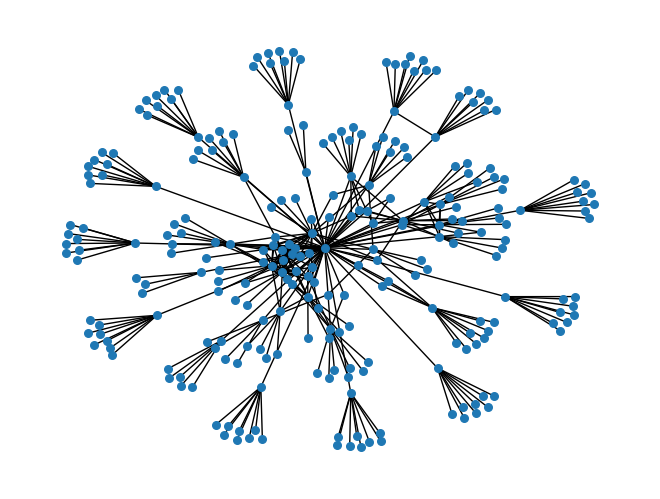

In [55]:
nx.draw(graph, node_size = 30)

### Determine the number of nodes and edges in the network

In [52]:
V = nx.number_of_nodes(graph)
E = nx.number_of_edges(graph)

In [53]:
print(f"The network has {V} nodes and {E} edges")

The network has 259 nodes and 369 edges


In [105]:
degrees = dict(nx.degree(graph))

### Find celebrities in the network (hint: degree centrality).


Relative degree centrality:

$C_D(i) = \frac{c_D(i)}{\mbox{highest possible degree}} = \frac{c_D(i)}{N-1}=\frac{k_i}{N-1}$

- $k_i$ is the degree of node $i$
- if there are no self-loops in a network of $N$ nodes, $N − 1$ is the highes possible degree of a node


In [167]:
DC = np.array(list(degrees.values())) / (V - 1)

In [168]:
DC = list(zip(degrees.keys(), DC))

In [169]:
DC

[('profile.php?id=100007502475142', 0.027131782945736434),
 ('chitalova.kz', 0.050387596899224806),
 ('juliana.amirhan', 0.04263565891472868),
 ('profile.php?id=100005913558261', 0.2364341085271318),
 ('HayDayOfficial/', 0.007751937984496124),
 ('lisa.martynova.7', 0.027131782945736434),
 ('profile.php?id=100009221965041', 0.05426356589147287),
 ('kateryna.bilorus', 0.08139534883720931),
 ('profile.php?id=100005733886175', 0.07751937984496124),
 ('superbulgakov', 0.046511627906976744),
 ('dana.kalantaievska', 0.08914728682170543),
 ('liza.shulgina.1', 0.08139534883720931),
 ('cheret.katherine', 0.027131782945736434),
 ('marta.gret.73', 0.050387596899224806),
 ('media/set/?set=a.101854020790815&type=3', 0.003875968992248062),
 ('profile.php?id=100008389686721', 0.015503875968992248),
 ('profile.php?id=100006868091656', 0.023255813953488372),
 ('di.nakonechna', 0.003875968992248062),
 ('olinka.novakova1993', 0.003875968992248062),
 ('IslandExperiment/', 0.003875968992248062),
 ('pages/%D

In [173]:
sorted_DC = sorted(DC, key = itemgetter(1), reverse = True)

In [185]:
sorted_DC[:5]

[('profile.php?id=100005913558261', 0.2364341085271318),
 ('dana.kalantaievska', 0.08914728682170543),
 ('kateryna.bilorus', 0.08139534883720931),
 ('liza.shulgina.1', 0.08139534883720931),
 ('profile.php?id=100005733886175', 0.07751937984496124)]

In [258]:
DC_nx = nx.degree_centrality(graph)
sorted_DC_nx = dict(sorted(DC_nx.items(), key = itemgetter(1), reverse = True))
sorted_DC_nx

{'profile.php?id=100005913558261': 0.2364341085271318,
 'dana.kalantaievska': 0.08914728682170542,
 'kateryna.bilorus': 0.08139534883720931,
 'liza.shulgina.1': 0.08139534883720931,
 'profile.php?id=100005733886175': 0.07751937984496124,
 'profile.php?id=100009221965041': 0.05426356589147287,
 'chitalova.kz': 0.050387596899224806,
 'marta.gret.73': 0.050387596899224806,
 'superbulgakov': 0.046511627906976744,
 'igors.poznakovs.3': 0.046511627906976744,
 'juliana.amirhan': 0.04263565891472868,
 'vikbchnk': 0.03875968992248062,
 'profile.php?id=100043684884846': 0.03875968992248062,
 'svetlana.fastovets.3': 0.03488372093023256,
 'profile.php?id=100004744154350': 0.03488372093023256,
 'profile.php?id=100009501316928': 0.03488372093023256,
 'irina.kostenko.752': 0.03488372093023256,
 'kostia.skopych': 0.03488372093023256,
 'iga.switalska.1': 0.03488372093023256,
 'profile.php?id=100005980576453': 0.03488372093023256,
 'ola.winiarska.121': 0.03488372093023256,
 'profile.php?id=1000185209049

### Check the data for friend paradox

This phenomenon states that most people have fewer friends than their friends have, on average.

Get the number of friends a specific person has

In [199]:
def get_num_friends(graph: nx.Graph, id: str):
    """
    Get number of friends of a person with specified id
    """
    return len(list(graph.neighbors(id)))

In [194]:
get_num_friends(graph, 'dana.kalantaievska')

23

Get the numbers of friends a person’s friends have

In [202]:
def get_num_friends_map(graph: nx.Graph):
    """
    Get a dictionary of people and their number of friends
    """

    all_people = list(graph.nodes)
    return {name: get_num_friends(graph, name) for name in all_people}
    
def get_num_friends_of_a_person_friends(graph: nx.Graph, person_id, num_friends_map: dict):
    friends = list(graph.neighbors(person_id))
    return [num_friends_map[id] for id in friends]

In [203]:
num_friends_map = get_num_friends_map(graph)
get_num_friends_of_a_person_friends(graph, "dana.kalantaievska", num_friends_map)

[7, 7, 21, 4, 7, 5, 5, 5, 2, 14, 5, 8, 5, 6, 5, 20, 1, 1, 3, 2, 3, 5, 61]

Get the number of friends a person’s friends have on average

In [206]:
def get_average_friends_of_a_person_friends(graph: nx.Graph, person_id):
    """
    Get the average number of friends a person's friends have
    """
    
    num_friends_map = get_num_friends_map(graph)
    num_friends_of_friends = get_num_friends_of_a_person_friends(graph, person_id, num_friends_map)
    return np.mean(num_friends_of_friends)

In [207]:
get_average_friends_of_a_person_friends(graph, "dana.kalantaievska")

8.782608695652174

Get the number of friends for all people in the network

In [213]:
def get_friends_df(graph: nx.Graph):
    """
    Get the number of friends for all people in the network
    """

    all_people = list(graph.nodes)
    num_friends = [
        {
            "person_id": person_id,
            "num_friends": get_num_friends(graph, person_id),
            "avg_friends_of_friends": round(
                get_average_friends_of_a_person_friends(graph, person_id), 2
            ),
        }
        for person_id in all_people
    ]
    return pd.DataFrame(num_friends)

In [215]:
num_friends_sample = get_friends_df(graph)
num_friends_sample

,person_id,num_friends,avg_friends_of_friends
0,profile.php?id=100007502475142,7,14.29
1,chitalova.kz,13,7.85
2,juliana.amirhan,11,8.73
3,profile.php?id=100005913558261,61,7.75
4,HayDayOfficial/,2,5.50
...,...,...,...
254,profile.php?id=100068051431646,1,9.00
255,profile.php?id=100002007383141,4,26.75
256,tatka.shetsko,2,41.00
257,profile.php?id=100009787425500,1,61.00


Find whether a person's friends have more friends than him/her on average.

-The column `num_friends` shows the number of friends a person has.
-The column `avg_friends_of_friends` shows the number of friends a person’s friends have on average.
-The column `friends_have_more_friends` indicates whether a person’s friends have more friends than himself/herself on average.

In [216]:
num_friends_sample = num_friends_sample.assign(
    friends_have_more_friends = lambda df_: df_.avg_friends_of_friends > df_.num_friends
)
num_friends_sample

,person_id,num_friends,avg_friends_of_friends,friends_have_more_friends
0,profile.php?id=100007502475142,7,14.29,True
1,chitalova.kz,13,7.85,False
2,juliana.amirhan,11,8.73,False
3,profile.php?id=100005913558261,61,7.75,False
4,HayDayOfficial/,2,5.50,True
...,...,...,...,...
254,profile.php?id=100068051431646,1,9.00,True
255,profile.php?id=100002007383141,4,26.75,True
256,tatka.shetsko,2,41.00,True
257,profile.php?id=100009787425500,1,61.00,True


In [222]:
num_friends_sample.friends_have_more_friends.sum()

235

Find out what percentage of people in the network have fewer friends than their friends have on average.

In [217]:
num_friends_sample.friends_have_more_friends.sum() / len(num_friends_sample)

0.9073359073359073

90,7% of people in the network have fewer friends than their friends have on average.

### Plot the degree distribution of the network

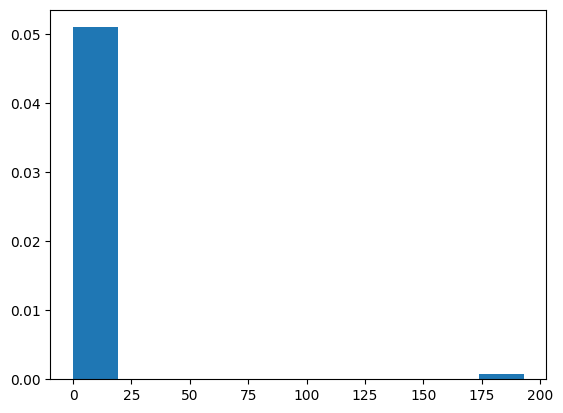

In [226]:
plt.hist(nx.degree_histogram(graph), density = True)
plt.show()

### Find communication bottlenecks (hint: betweenness centrality)

In [248]:
BC = nx.betweenness_centrality(graph)
BC

{'profile.php?id=100007502475142': 0.004117777174514119,
 'chitalova.kz': 0.04633316240863071,
 'juliana.amirhan': 0.04606672096039574,
 'profile.php?id=100005913558261': 0.9169926575500735,
 'HayDayOfficial/': 0.0,
 'lisa.martynova.7': 0.0015604550488271412,
 'profile.php?id=100009221965041': 0.03469254380484132,
 'kateryna.bilorus': 0.032409119048337216,
 'profile.php?id=100005733886175': 0.028548531973561372,
 'superbulgakov': 0.053748278184980736,
 'dana.kalantaievska': 0.024832773878109133,
 'liza.shulgina.1': 0.011615136590252005,
 'cheret.katherine': 0.008278011313935666,
 'marta.gret.73': 0.04623362390532783,
 'media/set/?set=a.101854020790815&type=3': 0.0,
 'profile.php?id=100008389686721': 0.0,
 'profile.php?id=100006868091656': 0.034300422428193665,
 'di.nakonechna': 0.0,
 'olinka.novakova1993': 0.0,
 'IslandExperiment/': 0.0,
 'pages/%D0%9A%D0%B8%D0%B5%D0%B2/111227078906045': 0.00030163182819051065,
 'pages/EuropeKiev/678815755560160': 0.0,
 'svetlana.fastovets.3': 0.053630

In [259]:
sorted_BC = dict(sorted(BC.items(), key = itemgetter(1), reverse = True))
sorted_BC

{'profile.php?id=100005913558261': 0.9169926575500735,
 'igors.poznakovs.3': 0.06121617953126414,
 'profile.php?id=100004744154350': 0.06117093475703556,
 'profile.php?id=100009501316928': 0.06117093475703556,
 'irina.kostenko.752': 0.06117093475703556,
 'profile.php?id=100043684884846': 0.06117093475703556,
 'profile.php?id=100018520904965': 0.06117093475703556,
 'profile.php?id=100017728478688': 0.06117093475703556,
 'profile.php?id=100009377636729': 0.06117093475703556,
 'profile.php?id=100009214760210': 0.06117093475703556,
 'zla.zayka': 0.06117093475703556,
 'profile.php?id=100006593268932': 0.06117093475703556,
 'svetlana.bovarovskaya': 0.06117093475703556,
 'superbulgakov': 0.053748278184980736,
 'svetlana.fastovets.3': 0.05363013905227279,
 'alena.marushchak.9': 0.05363013905227279,
 'vikbchnk': 0.049047346142631676,
 'chitalova.kz': 0.04633316240863071,
 'marta.gret.73': 0.04623362390532783,
 'juliana.amirhan': 0.04606672096039574,
 'dima.sudarenko.7': 0.03845805809429011,
 'p